# Titanic

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
train = pd.read_csv(train_url)
test_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv"
test = pd.read_csv(test_url)

In [3]:
print("***** Train_Set *****")
print(train.head())
print("\n")
print("***** Test_Set *****")
print(test.head())


***** Train_Set *****
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.05

In [4]:
print("***** Train_Set *****")
print(train.describe())
print("\n")
print("***** Test_Set *****")
print(test.describe())

***** Train_Set *****
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


***** Test_Set *****
       PassengerId      Pclass      

In [5]:
#Feature Name
print(train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


It is very important to note that not all machine learning algorithms support missing values in the data that you are feeding to them. K-Means being one of them. So we need to handle the missing values present in the data. Let's first see where are the values missing:

In [6]:
print("*****In the train set*****")
print(train.isnull().sum())
print("\n")
print("*****In the test set*****")
print(test.isnull().sum())



*****In the train set*****
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


*****In the test set*****
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


 Pandas provides the fillna() function for replacing missing values with a specific value. Let's apply that with Mean Imputation.

In [7]:
train.fillna(train.mean(), inplace=True)
test.fillna(test.mean(), inplace=True)

#Two features  Ticket and Cabin. Ticket is a mix of numeric and alphanumeric data types. Cabin is alphanumeric. Let see some sample values.

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.00000,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.00000,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.00000,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.00000,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.00000,2,0,A/4 48871,24.1500,NaN,S


### Let's see the survival count of passengers with respect to the following features:

    Pclass
    Sex
    SibSp
    Parch

Let's do that one by one:

Survival count with respect to Pclass:

In [8]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [9]:
#Survival count with respect to Sex:
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [10]:
#Survival count with respect to SibSp:
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


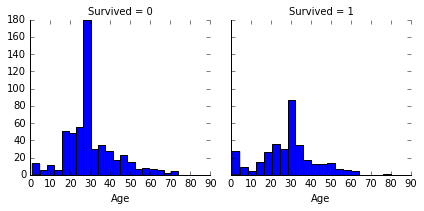

In [11]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

/home/akash_teehnoge/anaconda3/lib/python3.5/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


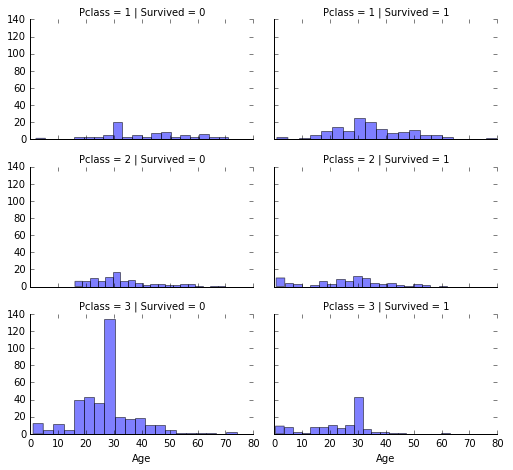

In [12]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [14]:
train = train.drop(['Name','Ticket', 'Cabin','Embarked'], axis=1)
test = test.drop(['Name','Ticket', 'Cabin','Embarked'], axis=1)

 Now that the dropping part is done let's convert the 'Sex' feature to a numerical one (only 'Sex' is remaining now which is a non-numeric feature). You will do this using a technique called Label Encoding.

In [15]:
labelEncoder = LabelEncoder()
labelEncoder.fit(train['Sex'])
labelEncoder.fit(test['Sex'])
train['Sex'] = labelEncoder.transform(train['Sex'])
test['Sex'] = labelEncoder.transform(test['Sex'])


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [17]:
X = np.array(train.drop(['Survived'], 1).astype(float))
y = np.array(train['Survived'])

In [18]:
kmeans = KMeans(n_clusters=2) # You want cluster the passenger records into 2: Survived or Not survived
kmeans.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=2, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [19]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))


0.49158249158249157


In [20]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
kmeans.fit(X_scaled)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=2, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [22]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))


0.37373737373737376
